In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [13]:
customer_data =  pd.read_csv('Mall_Customers.csv', index_col ="CustomerID")
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [14]:
customer_data.shape

(200, 4)

In [15]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [16]:
customer_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
input_data = customer_data[["Annual Income (k$)","Spending Score (1-100)"]]
input_data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= "k-means++", random_state = 34)
    kmeans.fit(input_data)
    
    wcss.append(kmeans.inertia_)

D:\CODING\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


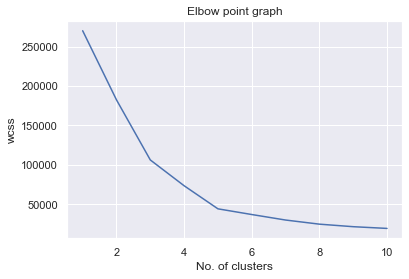

In [21]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, init= "k-means++", random_state = 0)
Y = kmeans.fit_predict(input_data)
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [26]:
input_data["cluster"]= Y
input_data.head()

<ipython-input-26-466a7844be75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data["cluster"]= Y


,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,4
2,15,81,3
3,16,6,4
4,16,77,3
5,17,40,4


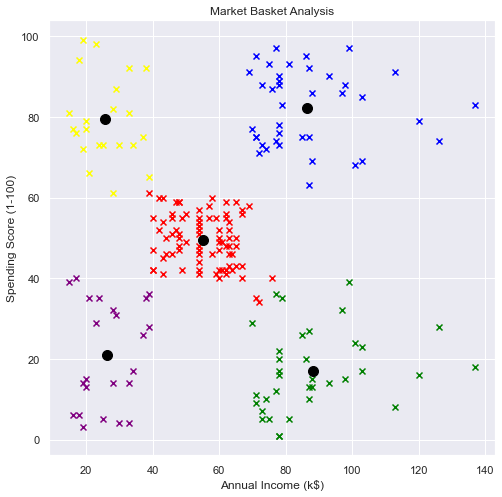

In [32]:
plt.figure(figsize=(8,8))

df1 = input_data[input_data.cluster==0]
df2 = input_data[input_data.cluster==1]
df3 = input_data[input_data.cluster==2]
df4 = input_data[input_data.cluster==3]
df5 = input_data[input_data.cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], marker="x", c= "green" , label="Cluster 1" )
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], marker="x", c= "red" , label="Cluster 2" )
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], marker="x", c= "blue" , label="Cluster 3" )
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], marker="x", c= "yellow" , label="Cluster 4" )
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], marker="x", c= "purple" , label="Cluster 5" )

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s =100, c= "black", label = "Centroids")

plt.title("Market Basket Analysis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()